<a href="https://colab.research.google.com/github/moonjune/test-repo/blob/master/knlp_kaggle_BoW_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#참고:  텐서플로와 머신러닝으로 시작하는 자연어 처리
!pip install kaggle
from google.colab import files
files.upload()

In [2]:
import os
os.chdir('/content')
!ls -1ha kaggle.json

kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!git clone https://github.com/NLP-kr/tensorflow-ml-nlp.git
import os
os.chdir('/content/tensorflow-ml-nlp')
!pip install -r requirements.txt


Cloning into 'tensorflow-ml-nlp'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 845 (delta 32), reused 27 (delta 15), pack-reused 778
Receiving objects: 100% (845/845), 160.14 MiB | 26.83 MiB/s, done.
Resolving deltas: 100% (499/499), done.
Checking out files: 100% (100/100), done.
     |████████████████████████████████| 19.4MB 2.6MB/s 
     |████████████████████████████████| 174kB 38.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/0e/2b/e8/c0b818ac4b3d35104d35e48cdc7afe27fc06ea277feed2831a
Successfully built JPype1


In [5]:
!mkdir -p /content/kaggle_bag_of_word
os.chdir('/content/kaggle_bag_of_word')
!kaggle competitions download -c word2vec-nlp-tutorial

  0% 0.00/276k [00:00<?, ?B/s]
100% 276k/276k [00:00<00:00, 40.8MB/s]
 96% 25.0M/26.0M [00:00<00:00, 51.6MB/s]
100% 26.0M/26.0M [00:00<00:00, 58.4MB/s]
 40% 5.00M/12.6M [00:00<00:00, 45.0MB/s]
100% 12.6M/12.6M [00:00<00:00, 61.7MB/s]
 77% 10.0M/13.0M [00:00<00:00, 102MB/s]
100% 13.0M/13.0M [00:00<00:00, 82.8MB/s]


In [6]:
!ls

labeledTrainData.tsv.zip  testData.tsv.zip
sampleSubmission.csv	  unlabeledTrainData.tsv.zip


In [0]:
import zipfile

In [0]:
DATA_IN_PATH = '/content/kaggle_bag_of_word/'

file_list = ['labeledTrainData.tsv.zip','unlabeledTrainData.tsv.zip', 'testData.tsv.zip']

for file in file_list:
  zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
  zipRef.extractall(DATA_IN_PATH)
  zipRef.close()
             

In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline # 그래프를 주피터 노트북에서 바로 그리도록 함

UsageError: unrecognized arguments: # 그래프를 주피터 노트북에서 바로 그리도록 함


In [0]:
train_data = pd.read_csv(DATA_IN_PATH+"labeledTrainData.tsv", header = 0, delimiter = "\t", quoting = 3)

In [11]:
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [12]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
  if 'tsv' in file and 'zip' not in file:
    print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
unlabeledTrainData.tsv        67.28MB
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB


In [13]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 25000


In [14]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

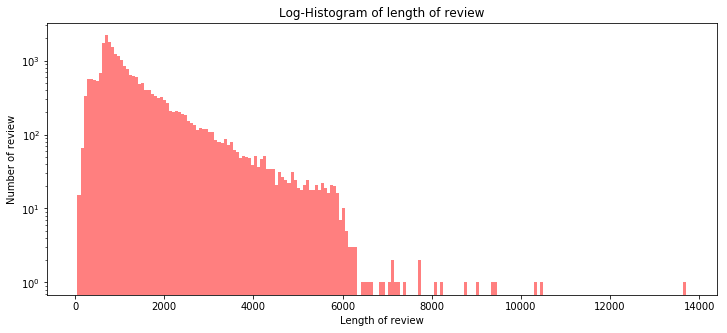

In [15]:
# 그래프에 대한 이미지 크기 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))

# 히스토그램 선언
# bins: 히스토그램 값에 대한 버킷 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins = 200, alpha = 0.5, color = 'r', label = 'word')
plt.yscale('log', nonposy = 'clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x축 라벨
plt.xlabel('Length of review')
# 그래프 y축 라벨
plt.ylabel('Number of review')

In [16]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))

print('리뷰 길이 1사분위값: {:.0f}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 3사분위값: {}'.format(np.percentile(train_length, 75)))



리뷰 길이 최댓값: 13710
리뷰 길이 최솟값: 54
리뷰 길이 평균값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 1사분위값: 705
리뷰 길이 중간값: 983.0
리뷰 길이 3사분위값: 1619.0


{'boxes': [<matplotlib.lines.Line2D at 0x7fe70693ed30>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe7069435f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe706952320>],
 'means': [<matplotlib.lines.Line2D at 0x7fe706943fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe706943c88>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe70693ef28>,
  <matplotlib.lines.Line2D at 0x7fe7069432b0>]}

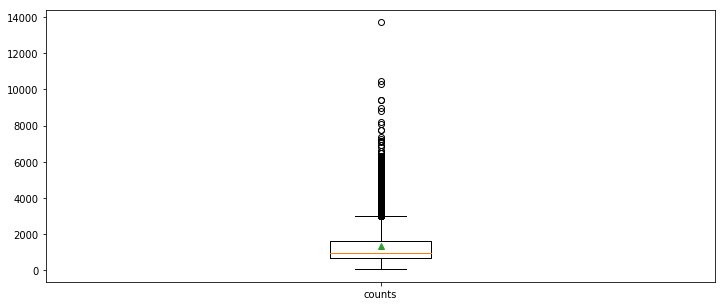

In [17]:
plt.figure(figsize = (12,5))
# 박스 플롯 생성
# 첫 번째 인자: 여러 분포에 대한 데이터 리스트를 입력
# lavels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
           labels = ['counts'],
           showmeans =True)

In [18]:
!pip install wordcloud

(-0.5, 799.5, 599.5, -0.5)

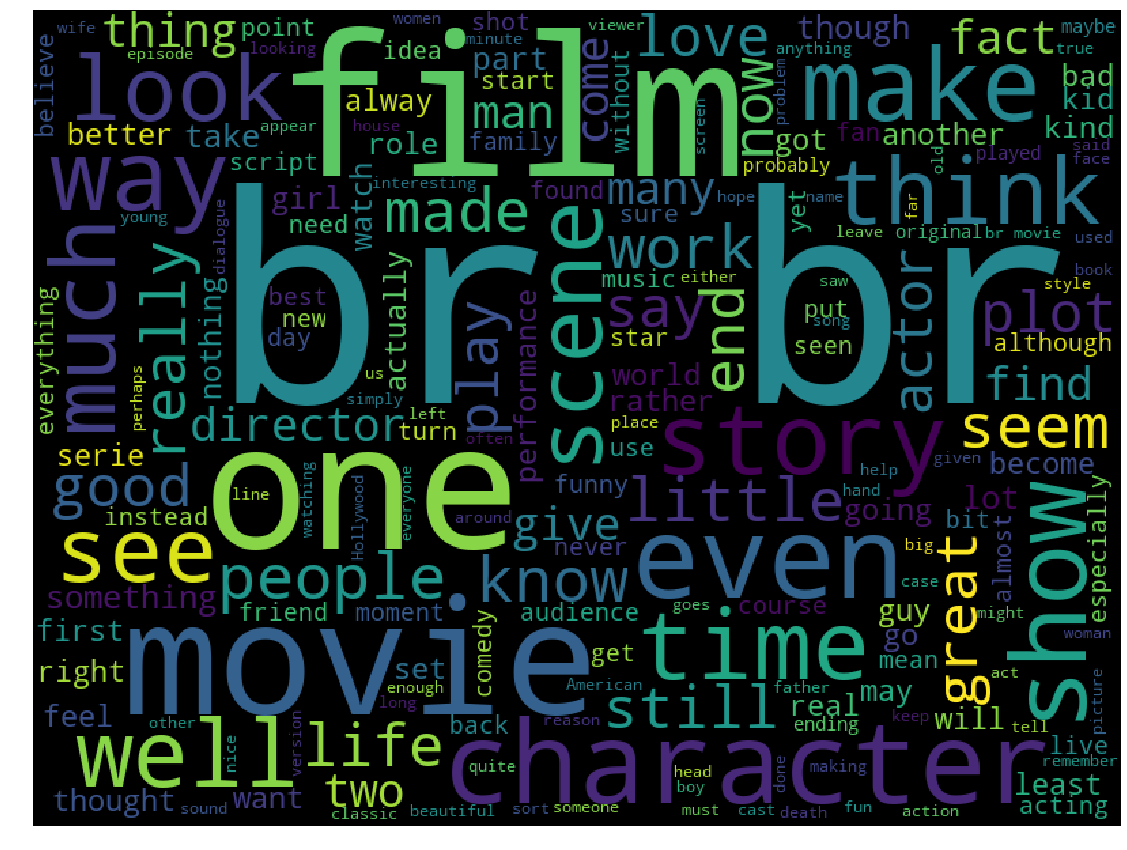

In [19]:
from wordcloud import WordCloud
cloud = WordCloud(width = 800, height = 600).generate(" ".join(train_data['review']))
plt.figure(figsize = (20, 15))
plt.imshow(cloud)
plt.axis('off')

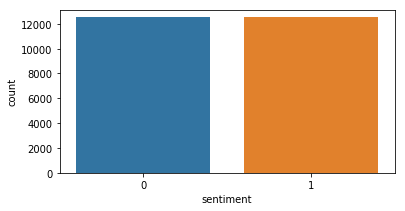

In [20]:
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])

In [21]:
print("긍정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


In [0]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of reviews')

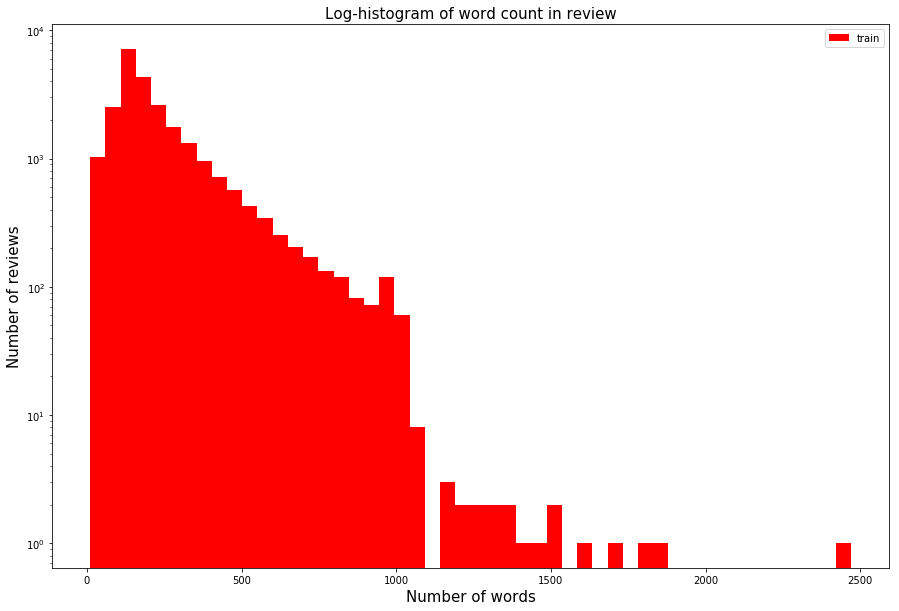

In [23]:
plt.figure(figsize = (15, 10))
plt.hist(train_word_counts, bins = 50, facecolor = 'r', label = 'train')
plt.title('Log-histogram of word count in review', fontsize = 15)
plt.yscale('log', nonposy = 'clip')
plt.legend()
plt.xlabel('Number of words', fontsize = 15)
plt.ylabel('Number of reviews', fontsize = 15)

In [24]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_word_counts)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_word_counts)))

print('리뷰 길이 1사분위값: {:.0f}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 길이 중간값: {}'.format(np.median(train_word_counts)))
print('리뷰 길이 3사분위값: {}'.format(np.percentile(train_word_counts, 75)))



리뷰 길이 최댓값: 2470
리뷰 길이 최솟값: 10
리뷰 길이 평균값: 233.79
리뷰 길이 표준편차: 173.74
리뷰 길이 1사분위값: 127
리뷰 길이 중간값: 174.0
리뷰 길이 3사분위값: 284.0


In [25]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) # 문장에 물음표 있음
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x)) 
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x])))
                  
print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
print('첫글자가 대문자인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 질문: {:.2f}%'.format(numbers * 100))

물음표가 있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫글자가 대문자인 질문: 0.00%
대문자가 있는 질문: 99.59%
숫자가 있는 질문: 56.66%


In [0]:
import re
import pandas as pd
import numpy
import json
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
DATA_IN_PATH = '/content/kaggle_bag_of_word/'
train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv',header = 0, delimiter = '\t', quoting = 3)
print(train_data['review'][0])


"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [29]:
review = train_data['review'][0]
review_text = BeautifulSoup(review, "html5lib").get_text()
review_text = re.sub("[^a-zA-Z]"," ",review_text)
print(review_text)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [0]:
stop_words = set(stopwords.words('english'))

review_text = review_text.lower()
words = review_text.split()
words = [w for w in words if not w in stop_words]

In [31]:
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [32]:
clean_review = ' '.join(words)
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [0]:
def preprocessing(review, remove_stopwords = False):
  review_text = BeautifulSoup(review, "html5lib").get_text()
  review_text = re.sub("[^a-zA-Z]", " ", review_text)
  words = review_text.lower().split()
  if remove_stopwords:
    stops = set(stopwords.words("english"))
    words = [w for w in words if not w in stops]
    clean_review = " ".join(words)
  else:
    clean_review = " ".join(words)
    
  return clean_review

In [34]:
clean_train_reviews = []
for review in train_data['review']:
  clean_train_reviews.append(preprocessing(review, remove_stopwords = True))
  
clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [0]:
clean_train_df = pd.DataFrame({'review':clean_train_reviews, 'sentiment': train_data['sentiment']})

In [36]:
clean_train_df.iloc[0]

review       stuff going moment mj started listening music ...
sentiment                                                    1
Name: 0, dtype: object

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [38]:
print(text_sequences[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [39]:
word_vocab = tokenizer.word_index
print(word_vocab)

{'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'every': 73, 'world': 74, 'cast': 75, 'us': 76, 'quite': 77, 'want': 78, 'things': 79, 'p

In [40]:
print("총 단어사전 길이: {}".format(len(word_vocab)))

총 단어사전 길이: 74065


In [0]:
data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

In [42]:
MAX_SEQUENCE_LENGTH = 174

train_inputs = pad_sequences(text_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding = 'post')

print('Shape of train data: ', train_inputs.shape)

Shape of train data:  (25000, 174)


In [43]:
train_labels = np.array(train_data['sentiment'])
print('Shape of lable tensor: ', train_labels.shape)

Shape of lable tensor:  (25000,)


In [0]:
DATA_IN_PATH = '/content/kaggle_bag_of_word/'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

import os

if not os.path.exists(DATA_IN_PATH):
  os.makedir(DATA_IN_PATH)
  

In [0]:
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

clean_train_df.to_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, index = False)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

In [0]:
test_data = pd.read_csv(DATA_IN_PATH + "testData.tsv", header = 0, delimiter = "\t", quoting = 3)

clean_test_reviews = []

for review in test_data['review']:
  clean_test_reviews.append(preprocessing(review, remove_stopwords = True))
clean_test_df =  pd.DataFrame({'review': clean_test_reviews, 'id': test_data['id']})
test_id = np.array(test_data['id'])

tokenizer.fit_on_texts(clean_test_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding = 'post')

In [0]:
TEST_INPUT_DATA = 'test_input.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_CLEAN_DATA, 'wb'), test_inputs)
clean_test_df.to_csv(DATA_IN_PATH + TEST_CLEAN_DATA, index = False)

In [0]:
#사이킷런을 이용한 로지스틱 분석
DATA_OUT_PATH = '/content/kaggle_bag_of_word/data_out/'
TRAIN_CLEAN_DATA = 'train_clean.csv'

train_data = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA, header = 0, quoting = 3)

reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'char', sublinear_tf = True,
                             ngram_range = (1,3), max_features = 5000)

X = vectorizer.fit_transform(reviews)


In [0]:
from sklearn.model_selection import train_test_split
import numpy as np

RANDOM_SEED = 42
TEST_SPLIT = 0.2

y = np.array(sentiments)

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [51]:
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight = 'balanced')
lgs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
print("Accuracy: {:.4f}".format(lgs.score(X_eval, y_eval)))

Accuracy: 0.8596


In [0]:
#TF_IDF 관련 제출 데이터 생성

TEST_CLEAN_DATA = 'test_clean.csv'

test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA, header = 0, quoting = 3) # 왜인지 몰라도 delimiter 삭제 필요

In [0]:
testDataVecs = vectorizer.transform(test_data['review'])

In [55]:
test_predicted = lgs.predict(testDataVecs)
print(test_predicted)

[1 0 1 ... 0 1 0]


In [0]:
# 제출 파일의 생성

DATA_OUT_PATH = '/content/kaggle_bag_of_word/data_out/'

if not os.path.exists(DATA_OUT_PATH):
  os.makedirs(DATA_OUT_PATH)
  
ids = list(test_data['id'])
answer_dataset = pd.DataFrame({'id':ids, 'sentiment': test_predicted})
answer_dataset['id'] = answer_dataset['id'].str.replace('"',"") # 큰따옴표가 계속 있어서 삭제..
answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_tfidf_answer.csv')

In [57]:
os.chdir('/content/kaggle_bag_of_word/data_out/')
!ls

lgs_tfidf_answer.csv


In [0]:
# # colab에서 파일 다운로드

# from google.colab import files
# files.download('/content/kaggle_bag_of_word/data_out/lgs_tfidf_answer.csv') 

In [59]:
os.chdir('/content/kaggle_bag_of_word/')
!ls

data_configs.json	  test_clean.csv    train_input.npy
data_out		  testData.tsv	    train_label.npy
labeledTrainData.tsv	  testData.tsv.zip  unlabeledTrainData.tsv
labeledTrainData.tsv.zip  test_input.npy    unlabeledTrainData.tsv.zip
sampleSubmission.csv	  train_clean.csv


In [0]:
#word2vec 모델 구현

DATA_IN_PATH = '/content/kaggle_bag_of_word/'
TRAIN_CLEAN_DATA = 'train_clean.csv'

train_data = pd.read_csv(DATA_IN_PATH + TRAIN_CLEAN_DATA)

reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

sentences = []
for review in reviews:
  sentences.append(review.split())

In [0]:
#word2vec 하이퍼 파라미터

num_features = 300
min_word_count = 40
num_workers = 4
context = 10
downsampling = 1e-3



In [62]:
!pip install gensim

In [0]:
import logging
logging.basicConfig(format = '%(asctime)s : %(levelnave)s : %(message)s', level = logging.INFO)

In [64]:
from gensim.models import word2vec

print("Training model...")
model = word2vec.Word2Vec(sentences,
                          workers = num_workers,
                          size = num_features,
                          min_count = min_word_count,
                          window = context,
                          sample = downsampling)

Training model...


In [65]:
# 모델 저장 후 Word2Vec.load()를 통해 재사용 가능 

model_name = "300features_40minwords_10context"
model.save(model_name)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
def get_features(words, model, num_features):
  feature_vector = np.zeros((num_features), dtype = np.float32)
  num_words = 0
  index2word_set = set(model.wv.index2word)
  
  for w in words:
    if w in index2word_set:
      num_words += 1
      feature_vector = np.add(feature_vector, model[w])
  feature_vector = np.divide(feature_vector, num_words)
  return feature_vector

In [0]:
def get_dataset(reviews, model, num_features):
  dataset = list()
  
  for s in reviews:
    dataset.append(get_features(s, model, num_features))
    
  reviewFeatureVecs = np.stack(dataset)
  
  return reviewFeatureVecs

In [68]:
train_data_vecs = get_dataset(sentences, model, num_features)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [0]:
from sklearn.model_selection import train_test_split
import numpy as np

X = train_data_vecs
y = np.array(sentiments)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size = TEST_SPLIT, random_state = RANDOM_SEED)

In [70]:
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight = 'balanced')
lgs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
print("Accuracy: %f" % lgs.score(X_eval, y_eval))

Accuracy: 0.862000


In [0]:
# 제출 데이터 생성

TEST_CLEAN_DATA = 'test_clean.csv'

test_data = pd.read_csv(DATA_IN_PATH + TEST_CLEAN_DATA)

test_review = list(test_data['review'])

In [0]:
test_sentences = []
for review in test_review:
  test_sentences.append(review.split())

In [74]:
len(test_sentences)

25000

In [75]:
test_data_vecs = get_dataset(test_sentences, model, num_features)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [76]:
test_data_vecs.shape

(25000, 300)

In [0]:
DATA_OUT_PATH = '/content/kaggle_bag_of_word/data_out/'

test_predicted = lgs.predict(test_data_vecs)

if not os.path.exists(DATA_OUT_PATH):
  os.makedirs(DATA_OUT_PATH)
  
ids = list(test_data['id'])
answer_dataset = pd.DataFrame({'id':ids, 'sentiment': test_predicted})
answer_dataset['id'] = answer_dataset['id'].str.replace('"',"") # 큰따옴표가 계속 있어서 삭제..
answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_answer.csv')

In [78]:
answer_dataset.head()

,id,sentiment
0,12311_10,1
1,8348_2,0
2,5828_4,1
3,7186_2,0
4,12128_7,1


In [79]:
print("Accuracy: {:.4f}".format(lgs.score(X_eval, y_eval)) )

Accuracy: 0.8620


In [0]:
# colab에서 파일 다운로드

from google.colab import files
files.download(DATA_OUT_PATH + 'lgs_answer.csv') 